In [6]:
import pandas as pd
import os

# import data files
df0 = pd.read_csv('paper-data-october-2018000000000000.csv')
df1 = pd.read_csv('paper-data-october-2018000000000001.csv')
df2 = pd.read_csv('paper-data-october-2018000000000002.csv')
df3 = pd.read_csv('paper-data-october-2018000000000003.csv')
df4 = pd.read_csv('paper-data-october-2018000000000004.csv')
df5 = pd.read_csv('paper-data-october-2018000000000005.csv')
df6 = pd.read_csv('paper-data-october-2018000000000006.csv')
df7 = pd.read_csv('paper-data-october-2018000000000007.csv')
df8 = pd.read_csv('paper-data-october-2018000000000008.csv')
df9 = pd.read_csv('paper-data-october-2018000000000009.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df = df0.append([df1,df2,df3,df4,df5,df6,df7,df8,df9], ignore_index=True)

In [8]:
df.shape

(7363679, 20)

In [9]:
df.head()

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
0,No need to apologize. I get what you’re saying...,nan,False,nan,ImInTheFutureAlso,NaN,nan,1540306847,t5_2qh1i,t3_9qjwhp,t1_e8asw9q,3,1541371705,0,0,e8at0jz,AskReddit,nan,NaN,NaN
1,How did you not feel it?,nan,False,nan,Jacobone,NaN,nan,1540306925,t5_2qh1i,t3_9qoi1m,t1_e8aq6uh,485,1541371744,0,0,e8at3s6,AskReddit,nan,NaN,NaN
2,What’s with the negative comments? There are t...,nan,False,nan,blackwe11_ninja,NaN,nan,1540306994,t5_2qqjc,t3_9qpoun,t3_9qpoun,-1,1541371805,0,0,e8at6pk,todayilearned,nan,NaN,NaN
3,How can you like that smell?,nan,False,nan,ThymeyWhymey,NaN,nan,1540307077,t5_2qh1i,t3_9qppry,t1_e8ass99,1,1541371851,0,0,e8ata1t,AskReddit,nan,NaN,NaN
4,"Open and shut case, Johnson.",nan,False,nan,DayOff4Superman,NaN,nan,1540307219,t5_2qh1i,t3_9qjwhp,t1_e8aq8am,42,1541371926,0,0,e8atfzw,AskReddit,nan,NaN,NaN


In [10]:
df.groupby('subreddit').nunique()['author']

subreddit
AskReddit        857138
funny            296660
todayilearned    167690
Name: author, dtype: int64

In [11]:
df.groupby('subreddit').nunique()['id']

subreddit
AskReddit        5834042
funny             999457
todayilearned     530180
Name: id, dtype: int64

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # suppress scientific notation 

df['score'].describe()

count   7363679.000
mean         21.759
std         378.141
min       -1063.000
25%           1.000
50%           1.000
75%           3.000
max       66595.000
Name: score, dtype: float64

In [13]:
df['score_binned'] = pd.cut(df['score'], 10)

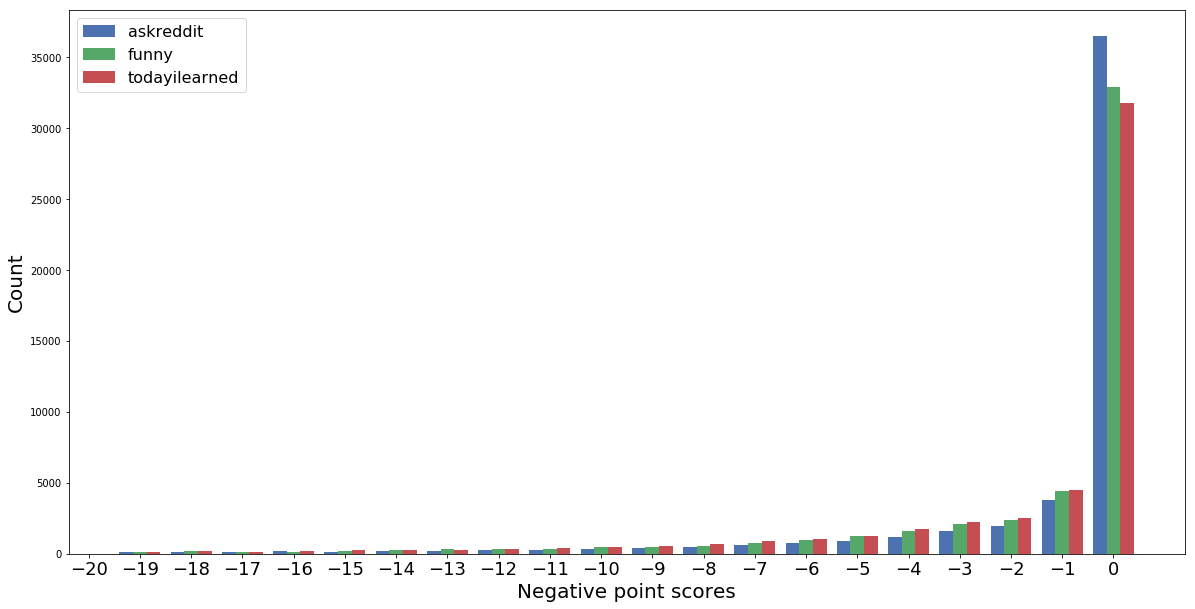

In [38]:
# plot DOWNVOTED scores by subreddit (between -20 and 0)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = df.loc[(df['score'] >= -20) & (df['score'] < 1)]['score'].loc[df['subreddit'] == 'AskReddit'].sample(50000)
y = df.loc[(df['score'] >= -20) & (df['score'] < 1)]['score'].loc[df['subreddit'] == 'funny'].sample(50000)
z = df.loc[(df['score'] >= -20) & (df['score'] < 1)]['score'].loc[df['subreddit'] == 'todayilearned'].sample(50000)

plt.figure(figsize=(20,10))
plt.hist([x, y, z], bins = 20, label=['askreddit', 'funny', 'todayilearned'], align='right')
plt.legend(loc='upper left',prop={'size': 16})
plt.xlabel('Negative point scores', fontsize=20)
plt.ylabel('Count', fontsize=20)
# plt.title('Upvoted scores by masculine VS feminine gendered comments', fontsize=20)
plt.xticks(range(-20,1), fontsize=18)

# output plot to file
plt.savefig('Figure1_DownvotedPointScores.png', dpi=600)

# show plot 
plt.show()

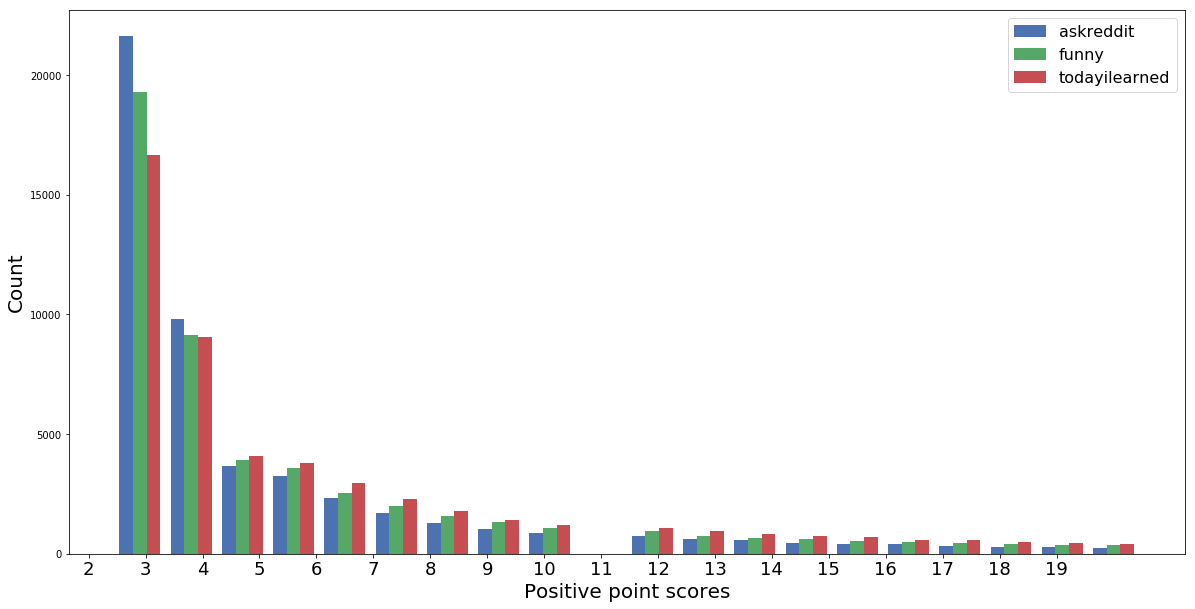

In [39]:
# plot UPVOTED scores by subreddit (between 2 and 20)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = df.loc[(df['score'] >= 2) & (df['score'] < 21)]['score'].loc[df['subreddit'] == 'AskReddit'].sample(50000)
y = df.loc[(df['score'] >= 2) & (df['score'] < 21)]['score'].loc[df['subreddit'] == 'funny'].sample(50000)
z = df.loc[(df['score'] >= 2) & (df['score'] < 21)]['score'].loc[df['subreddit'] == 'todayilearned'].sample(50000)

plt.figure(figsize=(20,10))
plt.hist([x, y, z], bins = 20, label=['askreddit', 'funny', 'todayilearned'], align='right')
plt.legend(loc='upper right',prop={'size': 16})
plt.xlabel('Positive point scores', fontsize=20)
plt.ylabel('Count', fontsize=20)
# plt.title('Upvoted scores by masculine VS feminine gendered comments', fontsize=20)
plt.xticks(range(2,20), fontsize=18)

# output plot to file
plt.savefig('Figure2_UpvotedPointScores.png', dpi=600)

# show plot 
plt.show()

# Sentiment analysis using VADER 

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [17]:
## first, we need to remove 'removed' and 'deleted' comments

to_drop = ['[removed]', '[deleted]']
new_df = df[~df['body'].isin(to_drop)]
new_df.shape

(6967329, 21)

In [18]:
# overwrite values in original dataframe 
df.update(new_df) 

In [19]:
# calculate for all texts in dataset

sentiment_scores = []

for text in df['body']:
    try:
        sentiment_scores.append(analyser.polarity_scores(text))
    except:
        sentiment_scores.append({'neg': 999, 'neu': 999, 'pos': 999, 'compound': 999})

In [20]:
sentiment_scores[0]

{'neg': 0.169, 'neu': 0.676, 'pos': 0.155, 'compound': -0.1027}

In [21]:
import random
random.sample(sentiment_scores,5)

[{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939},
 {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'compound': -0.8105},
 {'neg': 0.123, 'neu': 0.777, 'pos': 0.099, 'compound': -0.5315},
 {'neg': 0.113, 'neu': 0.856, 'pos': 0.031, 'compound': -0.9782},
 {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.296}]

In [22]:
sentiment_compound_scores = [item['compound'] for item in sentiment_scores]

In [23]:
# statistical analysis of sentiment scores
df['sentiment_score'] = sentiment_compound_scores

In [24]:
df.shape

(7363679, 22)

In [25]:
# what is the average sentiment score for upvoted comments?
df[df['score'] > 1]['sentiment_score'].describe()

count   3538528.000
mean          0.063
std           1.822
min          -1.000
25%          -0.178
50%           0.000
75%           0.420
max         999.000
Name: sentiment_score, dtype: float64

In [26]:
# what is the average sentiment score for downvoted comments?
df[df['score'] < 1]['sentiment_score'].describe()

count   504095.000
mean         0.014
std          4.004
min         -1.000
25%         -0.250
50%          0.000
75%          0.273
max        999.000
Name: sentiment_score, dtype: float64

In [27]:
# what is the average vote score for negative sentiment comments (< 0)?
df[df['sentiment_score'] < 0]['score'].describe()

count   1986542.000
mean         26.534
std         427.770
min        -585.000
25%           1.000
50%           2.000
75%           4.000
max       58871.000
Name: score, dtype: float64

In [28]:
# what is the average vote score for positive sentiment comments (> 0)?
df[df['sentiment_score'] > 0]['score'].describe()

count   2710193.000
mean         24.533
std         407.339
min        -871.000
25%           1.000
50%           2.000
75%           3.000
max       66595.000
Name: score, dtype: float64

In [29]:
# test whether the difference in means is statistically significant 
from scipy import stats

stats.ttest_ind(df[df['sentiment_score'] < 0]['score'],
               df[df['sentiment_score'] > 0]['score'])

Ttest_indResult(statistic=5.148895899845647, pvalue=2.620347772290226e-07)

## Construct networks for each comment thread (i.e. reply tree)

We want to construct a new dataframe that contains
- parent_id for all t1_ values (t1 = comments, t3 = posts)
- the score for the parent_id
- the number of replies to parent_id

In [49]:
import networkx as nx

In [42]:
# Construct a single network from all data 
graph_all_data = nx.from_pandas_edgelist(df, source = 'id', 
                                         target = 'target',
                                         edge_attr = ['score', 'sentiment_score', 'id', 'created_utc', 'author']
                                        )

In [43]:
# How many nodes 
graph_all_data.number_of_nodes()

7693416

In [44]:
# How many edges
graph_all_data.number_of_edges()

7363679

In [59]:
# Decompose the network into connected components.
# It is easy to show that this produces a list of sub-networks,
# where each network is a comment thread (i.e. reply tree)
g_comp = list((graph_all_data.subgraph(c) for c in nx.connected_components(graph_all_data)))

In [61]:
# If there are isolates (i.e. threads with only 1 comment), we filter them out.
g_comp_noIsolates = [el for el in g_comp if len(el)!=1]

In [98]:
# How many reply trees containing at least two comments (i.e. nodes)
len(g_comp_noIsolates)

329737

In [63]:
# As an example, examine the nth network
g_comp_noIsolates[10].number_of_nodes()

19

In [ ]:
# we loop through each component of the graph list,
# and we collect the number of replies and sentiment score for each root node,
# and we store it in a list

replies_and_sentiment_root_nodes = []

# for comp in g_comp_noIsolates:
for num, name in enumerate(g_comp_noIsolates):
    if(num % 1000 == 0):
        print(str(num)) # keep track of progress 
    test_subg_nodes = g_comp_noIsolates[num]
    score_temp = df[df['id']==min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[0]]['sentiment_score']
    # vote_score_temp = row['score']
    deg_root_node = test_subg_nodes.degree[min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[0]]
    node_id_temp = min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[0]
    if(len(score_temp)!=0):
        replies_and_sentiment_root_nodes.append({'node_id': node_id_temp,
                                                 # 'score':score_temp,
                                                 'sentiment_score': score_temp, 
                                                 'node_degree': deg_root_node})

In [67]:
len(replies_and_sentiment_root_nodes)

94519

In [ ]:
df_reply_and_sentiment = pd.DataFrame(replies_and_sentiment_root_nodes)

In [ ]:
df_reply_and_sentiment['sentiment_score'] = df_reply_and_sentiment['sentiment_score'].astype(float)

In [ ]:
df_reply_and_sentiment.head()

,node_id,sentiment_score,node_degree
0,e8lxzkb,0.000,1
1,e71g23i,0.000,1
2,e8jv6x3,0.482,1
3,e7epaf1,0.777,1
4,e7ah0zh,0.000,1


In [ ]:
# there is an erroneous value (max = 999) that has to be removed
df_reply_and_sentiment['sentiment_score'].describe()

count   94519.000
mean        0.297
std         3.285
min        -1.000
25%         0.000
50%         0.361
75%         0.777
max       999.000
Name: sentiment_score, dtype: float64

In [ ]:
df_reply_and_sentiment_no999 = df_reply_and_sentiment[df_reply_and_sentiment['sentiment_score'] <= 1]

In [ ]:
df_reply_and_sentiment.update(df_reply_and_sentiment_no999) 

In [ ]:
# check that we fixed the erroneous value
df_reply_and_sentiment['sentiment_score'].describe()

count   94519.000
mean        0.297
std         3.285
min        -1.000
25%         0.000
50%         0.361
75%         0.777
max       999.000
Name: sentiment_score, dtype: float64

In [ ]:
# what is the average tree size for POSITIVE sentiment comments (> 0)?

df_reply_and_sentiment[df_reply_and_sentiment['sentiment_score'] > 0.5]['node_degree'].describe()

count   34274.000
mean        1.086
std         0.349
min         1.000
25%         1.000
50%         1.000
75%         1.000
max        19.000
Name: node_degree, dtype: float64

In [ ]:
# what is the average tree size for NEGATIVE sentiment comments (< 0)?

df_reply_and_sentiment[df_reply_and_sentiment['sentiment_score'] < -0.5]['node_degree'].describe()

count   7357.000
mean       1.372
std        0.649
min        1.000
25%        1.000
50%        1.000
75%        2.000
max       11.000
Name: node_degree, dtype: float64

## How do vote scores affect tree size (number of replies?)

## RQ2 - how do vote scores affect emotional valence of comment threads? 

In [636]:
# loop through df,
# for each id, we check if it has any other rows that are its target,
# if so, we get the mean sentiment score of those rows
# if not, we skip

In [ ]:
replies_and_votescore_root_nodes = []

currElem = 1
for index, row in df.iterrows():
    
    if(len(df[df['target']==row['id']])==0):
        continue # skip to next iter, if there are no replies (thus length 0 of sentiment score vector)
    
    if(currElem % 100 == 0):
        print(str(currElem)) # keep track of progress 
        
    node_id_temp = row['id']
    vote_score_temp = row['score']
    score_temp = df[df['target']==row['id']]['sentiment_score'].mean()
    num_replies_temp = len(df[df['target']==row['id']])

    replies_and_votescore_root_nodes.append({
        'node_id': node_id_temp, 
        'score': vote_score_temp,
        'mean_sentiment_score_of_replies': score_temp,
        'node_number_of_replies': num_replies_temp})
    
    currElem = currElem + 1

In [ ]:
replies_and_votescore_root_nodes

In [ ]:
df_score_and_sentiment = pd.DataFrame(replies_and_votescore_root_nodes)

In [ ]:
df_score_and_sentiment['mean_sentiment_score_of_replies'] = df_score_and_sentiment['mean_sentiment_score_of_replies'].astype(float)
df_score_and_sentiment.score = df_score_and_sentiment.score.astype(int)

In [ ]:
df_score_and_sentiment.describe()

## RQ2 - how do vote scores affect emotional valence of comment threads? 

In [1]:
# we loop through each component of the graph list,
# and we collect the score for each root node,
# and mean sentiment score of replies,
# and we store it in a list

In [139]:
def extract_data(test_subg_nodes):
    vote_score_temp = df[df['id']==min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[1]]['score']
    if(len(vote_score_temp)==0):
        return
    deg_root_node = test_subg_nodes.degree[min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[0]]
    node_id_temp = min(nx.get_edge_attributes(test_subg_nodes, 'created_utc'))[0]
    if(len(vote_score_temp)!=0):    
        return({'node_id': node_id_temp,
                'score': vote_score_temp,
                'node_degree': deg_root_node})
        
replies_and_votescore_root_nodes = [extract_data(test_subg_nodes) for test_subg_nodes in g_comp_noIsolates]

In [140]:
replies_and_votescore_root_nodes

[{'node_id': '9qjwhp', 'score': 2634500   7430.000
  Name: score, dtype: float64, 'node_degree': 2753},
 {'node_id': '9qoi1m', 'score': 5608511   125.000
  Name: score, dtype: float64, 'node_degree': 18506},
 {'node_id': '9qpoun', 'score': 3086956   2.000
  Name: score, dtype: float64, 'node_degree': 11},
 {'node_id': '9qppry', 'score': 3761866   24.000
  Name: score, dtype: float64, 'node_degree': 25},
 {'node_id': '9s2vp4', 'score': 2198522   324.000
  Name: score, dtype: float64, 'node_degree': 172},
 {'node_id': '9s4veo', 'score': 1567149   3.000
  Name: score, dtype: float64, 'node_degree': 4},
 {'node_id': '9s4e6c', 'score': 5287429   9.000
  Name: score, dtype: float64, 'node_degree': 10},
 {'node_id': '9kqikt', 'score': 5145770   189.000
  Name: score, dtype: float64, 'node_degree': 1692},
 {'node_id': '9ksnmn', 'score': 10   1.000
  Name: score, dtype: float64, 'node_degree': 1},
 None,
 {'node_id': '9ksr0s', 'score': 12   1.000
  Name: score, dtype: float64, 'node_degree': 9}

In [141]:
# remove the None elements
replies_and_votescore_root_nodes_fixed = [i for i in replies_and_votescore_root_nodes if i]

In [132]:
replies_and_votescore_root_nodes_fixed

[{'node_id': '9qjwhp', 'score': 2634500   7430.000
  Name: score, dtype: float64, 'node_degree': 2753},
 {'node_id': '9qoi1m', 'score': 5608511   125.000
  Name: score, dtype: float64, 'node_degree': 18506},
 {'node_id': '9qpoun', 'score': 3086956   2.000
  Name: score, dtype: float64, 'node_degree': 11},
 {'node_id': '9qppry', 'score': 3761866   24.000
  Name: score, dtype: float64, 'node_degree': 25},
 {'node_id': '9s2vp4', 'score': 2198522   324.000
  Name: score, dtype: float64, 'node_degree': 172},
 {'node_id': '9s4veo', 'score': 1567149   3.000
  Name: score, dtype: float64, 'node_degree': 4},
 {'node_id': '9s4e6c', 'score': 5287429   9.000
  Name: score, dtype: float64, 'node_degree': 10},
 {'node_id': '9kqikt', 'score': 5145770   189.000
  Name: score, dtype: float64, 'node_degree': 1692},
 {'node_id': '9ksnmn', 'score': 10   1.000
  Name: score, dtype: float64, 'node_degree': 1}]

In [142]:
replies_and_votescore_root_nodes_DF = pd.DataFrame(replies_and_votescore_root_nodes_fixed)

In [143]:
# convert float to int for the 'score' column 
replies_and_votescore_root_nodes_DF['score'] = replies_and_votescore_root_nodes_DF['score'].astype(int)

In [223]:
# write to file
replies_and_votescore_root_nodes_DF.to_csv('replies_and_votescore_root_nodes_DF.csv')

In [144]:
replies_and_votescore_root_nodes_DF.head()

,node_id,score,node_degree
0,9qjwhp,7430,2753
1,9qoi1m,125,18506
2,9qpoun,2,11
3,9qppry,24,25
4,9s2vp4,324,172


In [201]:
# Slightly upvoted 
# 2 to 20 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 1) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 20)].describe()

,score,node_degree
count,108486.000,108486.000
mean,3.778,11.683
std,2.833,176.177
min,2.000,1.000
25%,2.000,4.000
50%,3.000,7.000
75%,4.000,11.000
max,20.000,46015.000


In [213]:
# Slightly upvoted MEDIAN
# 2 to 20 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 1) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 20)].median()

score         3.000
node_degree   7.000
dtype: float64

In [202]:
# Moderately upvoted 
# 21 to 40 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 20) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 40)].describe()

,score,node_degree
count,1990.000,1990.000
mean,28.252,60.668
std,5.628,245.139
min,21.000,1.000
25%,23.000,11.250
50%,27.000,22.000
75%,32.000,48.000
max,40.000,6360.000


In [214]:
# Moderately upvoted MEDIAN
# 21 to 40 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 20) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 40)].median()

score         27.000
node_degree   22.000
dtype: float64

In [203]:
# Greatly upvoted 
# 41 to 60 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 40) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 60)].describe()

,score,node_degree
count,699.000,699.000
mean,49.864,79.454
std,5.794,168.594
min,41.000,1.000
25%,45.000,16.000
50%,50.000,30.000
75%,55.000,64.500
max,60.000,1931.000


In [215]:
# Greatly upvoted MEDIAN
# 41 to 60 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 40) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 60)].median()

score         50.000
node_degree   30.000
dtype: float64

In [204]:
# Very greatly upvoted 
# 61 to 80 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 60) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 80)].describe()

,score,node_degree
count,420.000,420.000
mean,69.052,176.512
std,5.437,613.638
min,61.000,1.000
25%,64.000,18.750
50%,69.000,38.500
75%,73.000,95.000
max,80.000,6691.000


In [216]:
# Very greatly upvoted 
# 61 to 80 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 60) & 
                                    (replies_and_votescore_root_nodes_DF['score'] <= 80)].median()

score         69.000
node_degree   38.500
dtype: float64

In [200]:
# Extremely upvoted
# Greater than 100 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 100)].describe()

,score,node_degree
count,1730.000,1730.000
mean,1051.614,413.668
std,2469.329,1193.984
min,101.000,1.000
25%,162.000,45.000
50%,308.500,104.500
75%,735.500,280.750
max,25552.000,18506.000


In [217]:
# Extremely upvoted MEDIAN
# Greater than 100 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] > 100)].median()

score         308.500
node_degree   104.500
dtype: float64

In [208]:
# Slightly downvoted 
# -20 to 0 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < 1) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -20)].describe()

,score,node_degree
count,12189.000,12189.000
mean,-1.056,14.907
std,2.499,74.236
min,-20.000,1.000
25%,-1.000,3.000
50%,0.000,7.000
75%,0.000,12.000
max,0.000,3706.000


In [218]:
# Slightly downvoted MEDIAN
# -20 to 0 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < 1) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -20)].median()

score         0.000
node_degree   7.000
dtype: float64

In [209]:
# Moderately downvoted 
# -40 to -21 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -20) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -40)].describe()

,score,node_degree
count,81.000,81.000
mean,-28.272,94.642
std,5.901,174.473
min,-40.000,4.000
25%,-34.000,17.000
50%,-27.000,33.000
75%,-23.000,77.000
max,-21.000,1032.000


In [219]:
# Moderately downvoted MEDIAN
# -40 to -21 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -20) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -40)].median()

score         -27.000
node_degree    33.000
dtype: float64

In [210]:
# Greatly downvoted 
# -60 to -41 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -40) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -60)].describe()

,score,node_degree
count,20.000,20.000
mean,-47.500,154.950
std,6.160,180.214
min,-60.000,5.000
25%,-51.750,39.500
50%,-45.500,94.500
75%,-42.750,169.750
max,-41.000,633.000


In [220]:
# Greatly downvoted MEDIAN
# -60 to -41 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -40) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -60)].median()

score         -45.500
node_degree    94.500
dtype: float64

In [211]:
# Very greatly downvoted 
# -60 to -81
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -60) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -80)].describe()

,score,node_degree
count,11.000,11.000
mean,-69.545,353.455
std,6.121,1005.050
min,-79.000,3.000
25%,-73.500,20.000
50%,-69.000,39.000
75%,-64.500,94.000
max,-61.000,3381.000


In [221]:
# Very greatly downvoted MEDIAN
# -60 to -81
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -60) & 
                                    (replies_and_votescore_root_nodes_DF['score'] >= -80)].median()

score         -69.000
node_degree    39.000
dtype: float64

In [212]:
# Extremely downvoted 
# Less than -100 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -100)].describe()

,score,node_degree
count,7.000,7.000
mean,-148.286,83.714
std,23.200,48.479
min,-175.000,34.000
25%,-163.500,50.500
50%,-151.000,76.000
75%,-139.000,102.500
max,-107.000,170.000


In [222]:
# Extremely downvoted MEDIAN
# Less than -100 
replies_and_votescore_root_nodes_DF[(replies_and_votescore_root_nodes_DF['score'] < -100)].median()

score         -151.000
node_degree     76.000
dtype: float64